In [1]:

### This python code is an implementation of some of the most common power quality calculations in electrical engineering application 
### They are sometimes used to monitore and diagnose some IM and supply anomalies
# importing main packages

import matplotlib.pyplot as plt
#import plotly.plotly as py
import numpy as np
import pandas as pd
import math as mt
from scipy.signal import find_peaks

In [2]:
# reading three phase current and voltage from local machine and displaying the top 5 rows
df=pd.read_excel("C:\\Users\\mayele\\Desktop\\PythonProjects\\combinedtest.xlsx",sheet_name='Sheet1')
df.head()

,IA,IB,IC,VA,VB,VC
0,16.69789,-14.074860,-2.397073,319.8829,27.14873,-283.6284
1,16.83794,-13.127200,-3.430650,310.0182,66.43851,-297.6243
2,16.89292,-12.041210,-4.545847,288.0969,96.95975,-321.1476
3,16.87746,-10.899380,-5.680806,265.4168,119.63990,-328.6514
4,16.90753,-9.738647,-6.817482,248.0483,155.13560,-334.8062


In [3]:
# reading the individual waveforms for processing
V1wf=df["VA"]
V2wf=df["VB"]
V3wf=df["VC"]

I1wf=df["IA"]
I2wf=df["IB"]
I3wf=df["IC"]
len(I1wf)

20000

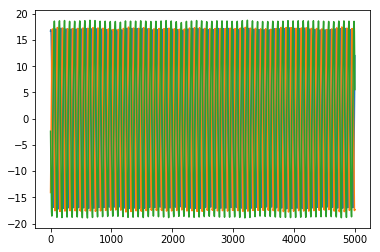

In [4]:
# visualizing the three phase currents the first 5000 points
plt.plot(I1wf[0:4999])
plt.plot(I2wf[0:4999])
plt.plot(I3wf[0:4999])

In [5]:
########################################################################################## Calculating Voltage RMS
VphArms=np.sqrt(np.sum([i*i for i in V1wf])/len(V1wf))
VphBrms=np.sqrt(np.sum([i*i for i in V2wf])/len(V2wf))
VphCrms=np.sqrt(np.sum([i*i for i in V3wf])/len(V3wf))
print("Phase A rms is {}".format(VphArms))
print("Phase B rms is {}".format(VphBrms))
print("Phase C rms is {}".format(VphCrms))

Phase A rms is 277.70843090196576
Phase B rms is 279.2177162609464
Phase C rms is 282.96983207639033


In [6]:
########################################################################################## Calculating Current RMS
IphArms=np.sqrt(np.sum([i*i for i in I1wf])/len(I1wf))
IphBrms=np.sqrt(np.sum([i*i for i in I2wf])/len(I2wf))
IphCrms=np.sqrt(np.sum([i*i for i in I3wf])/len(I3wf))
print("Phase A rms is {}".format(IphArms))
print("Phase B rms is {}".format(IphBrms))
print("Phase C rms is {}".format(IphCrms))

Phase A rms is 12.518055248640142
Phase B rms is 12.807444467712676
Phase C rms is 13.06531489853962


In [7]:
############################################################Calculating pf for each phase and average pf

##VA,IC...VB,IA,  VC,IB

PhaseAVpf=np.mean(np.multiply(V1wf,I1wf))/(VphArms*IphArms)
PhaseBVpf=np.mean(np.multiply(V2wf,I2wf))/(VphBrms*IphBrms)
PhaseCVpf=np.mean(np.multiply(V3wf,I3wf))/(VphCrms*IphCrms)
PF=np.abs(np.mean([PhaseAVpf,PhaseBVpf,PhaseCVpf]))
print("Average pf is {}".format(PF))

Average pf is 0.619818392625171


In [8]:
################################################################ Calculating Crest factors for voltage and current

cfVA=max(V1wf)/(VphArms)
cfVB=max(V2wf)/(VphBrms)
cfVC=max(V3wf)/(VphCrms)
cfV=np.mean([cfVA,cfVB,cfVC])

cfIA=max(I1wf)/(IphArms)
cfIB=max(I2wf)/(IphBrms)
cfIC=max(I3wf)/(IphCrms)
cfI=np.mean([cfIA,cfIB,cfIC])
print("Average voltage CF is {}".format(cfV))
print("Average Current CF is {}".format(cfI))

Average voltage CF is 1.552982866729255
Average Current CF is 1.4015764348419484


In [31]:
################################################################# Calculating power
################################################################## Apparent power
VAA=VphArms*IphArms
VAB=VphBrms*IphBrms
VAC=VphCrms*IphCrms
VATotal=np.sum([VAA,VAB,VAC])

print("Total Apparent Power is  {}".format(VATotal))

Total Apparent Power is  10749.524839322514


In [32]:
###################################################################Active Power

WA=VphArms*IphArms*abs(PhaseAVpf)
WB=VphBrms*IphBrms*abs(PhaseBVpf)
WC=VphCrms*IphCrms*abs(PhaseCVpf)
WTotal=np.sum([WA,WB,WC])
print("Total Active Power is  {}".format(WTotal))

Total Active Power is  6659.123296389369


In [14]:
################################################################### Reactive Power

VARA=np.sqrt(VAA**2-WA**2)
VARB=np.sqrt(VAB**2-WB**2)
VARC=np.sqrt(VAC**2-WC**2)
VARTotal=np.sum([VARA,VARB,VARC])

print("Total Reactive Power is  {}".format(VARTotal))

Total Reactive Power is  8431.253308153631


In [15]:
######################################################################### Voltage and Current Unbalance
#VUN
meanrms=np.mean([VphArms,VphBrms,VphCrms])
maxDevrms= max([np.abs(meanrms-VphArms),np.abs(meanrms-VphBrms),np.abs(meanrms-VphCrms)])
VUN=(maxDevrms/meanrms)*100
#IUN
meanrms=np.mean([IphArms,IphBrms,IphCrms])

maxDevrms= max([np.abs(meanrms-IphArms),np.abs(meanrms-IphBrms),np.abs(meanrms-IphCrms)])
IUN=(maxDevrms/meanrms)*100

print("Calculated Voltage Unbalance is  {}".format(VUN))
print("Calculated Current Unbalance is  {}".format(IUN))

Calculated Voltage Unbalance is  1.0731706321575698
Calculated Current Unbalance is  2.179294389464342


Text(0,0.5,'amplitude')

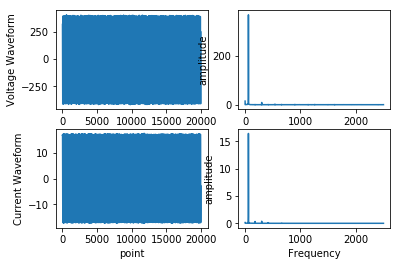

In [19]:
#################################################### Calculating Voltage THD from fft 
#################################################### Calculating fft current and voltage
Fs = 5000.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector
ff = 60;   # frequency of the signal
# V1wf=df["VARead"]
n = len(I1wf) # length of the signal...20000
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq =frq[range(int(n/2))]# one side frequency range


Y = np.fft.fft(I1wf)/n # fft current computing and normalization
Z= np.fft.fft(V1wf)/n # fft voltage computing and normalization

#Y = Y[range(int(n/2))]
Y = Y[range(int(n/2))]
Z=Z[range(int(n/2))]
fig, ax = plt.subplots(2,2)
ax[0,0].plot(V1wf,'tab:blue')
ax[0,0].set_xlabel('point')
ax[0,0].set_ylabel('Voltage Waveform')
ax[0,1].plot(frq,2*abs(Z)) # plotting the voltage spectrum
ax[0,1].set_xlabel('Frequency')
ax[0,1].set_ylabel('amplitude')
ax[1,0].plot(I1wf,'tab:blue')
ax[1,0].set_xlabel('point')
ax[1,0].set_ylabel('Current Waveform')
ax[1,1].plot(frq,2*abs(Y)) # plotting the voltage spectrum
ax[1,1].set_xlabel('Frequency')
ax[1,1].set_ylabel('amplitude')

In [25]:
#################################################### Calculating Voltage THD from fft 
x=2*abs(Z)
THDv=(np.sum(np.sqrt(x*x)))/max(x)
print("Voltage Total harmonic Distortion (THDv)  {}".format(THDv))

Voltage Total harmonic Distortion (THDv)  5.297287695880145


In [26]:
#################################################### Calculating Current THD from fft 
x=2*abs(Y)
THDi=(np.sum(np.sqrt(x*x)))/max(x)
print("Current Total harmonic Distortion (THDi)  {}".format(THDi))

Current Total harmonic Distortion (THDi)  4.951769746782829


In [29]:
######################################################### Calculating Over/ Under Voltage

## Over Voltage

## Rated Voltage 13800
Vrated=13800
OV=(np.mean([VphArms,VphBrms,VphCrms])-Vrated)/Vrated

## Rated Voltage 13800

UV=(Vrated-np.mean([VphArms,VphBrms,VphCrms]))/Vrated

### over voltage and under voltage do not occure at the same time hence he positive value only is taken
if OV >=0:
    print("Over Voltage is  {}".format(OV))
    print("There is no under voltage condition developed!")
elif UV>=0:
    print("Under Voltage is  {}".format(UV))
    print("There is no Over voltage condition developed!")


Under Voltage is  0.979712657506297
There is no Over voltage condition developed!
